# input datasets
# 3 Normal operations: 270 lbs of load, input shaft rate of 25 Hz, sample rate of 97,656 sps, for 6 seconds
# 7 Outer race fault case with varying loads 25,50,100,150,200,250,300 lbs sampling rate of 48828 sps for 3 seconds
# 7 Inner race fault case with varying laods 0,50,100,150,200,250,300 lbs for sampling rate of 48828 sps for 3 seconds

In [2]:
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import kurtosis
from scipy.stats import skew
import csv
import os

In [73]:
df=pd.read_csv("Baseline_1.txt",sep='\n',names = ['Normal_operation_1'])

In [74]:
df.head()

,Normal_operation_1
0,0.831588
1,0.038702
2,0.467645
3,0.661645
4,1.770335


# cycle_parameters
no. of samples_in one cycle = 97656/25 = 3906


In [75]:
length = len(df['Normal_operation_1'])
length

585936

# based on one cycle the statistical values are calulated 

In [71]:
#calculation of statistical_parameters
header =['Mean','RMS','Maximum','Minimum','Skewness','Kurtosis','Crest_factor','Form_factor','Std_dev']
j = 3906
k =0
C = np.linspace(0,length,int(length/1953))
len(C)

75

# Preparing dataset and saving in to Feature file

In [72]:
for value in C:
    mean_val=st.mean(np.array(df['Normal_operation_1'][k:j]))
    rms_val=np.sqrt(st.mean(np.array(df['Normal_operation_1'][k:j])**2))
    maximum_val = max(np.array(df['Normal_operation_1'][k:j]))
    minimum_val = min(np.array(df['Normal_operation_1'][k:j]))
    skew_val= skew(np.array(df['Normal_operation_1'][k:j]),bias=False)
    kurts_val = kurtosis(np.array(df['Normal_operation_1'][k:j]),bias = False)
    crest_val = maximum_val/rms_val
    formfac_val = rms_val/mean_val
    std_dev_val = st.stdev(np.array(df['Normal_operation_1'][k:j]))
    operation = 'IR'
    load = 300
    lis = [load,mean_val,rms_val,maximum_val,minimum_val,skew_val,kurts_val,crest_val,formfac_val,std_dev_val,operation]
    with open('Feature_1.csv','a',newline='') as fp:
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(lis)   
    k=j+1
    j= j+1953
   

# Data analysis 

In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('Feature_1.csv')

In [78]:
data.head()

,Load,Mean_val,rms_val,maximum_val,minimum_val,skew_val,kurts_val,crest_val,formfac_val,std_dev_val,Classification
0,270,-0.008934,0.811929,1.779109,-1.483635,0.234996,-0.778033,2.191213,-90.884540,0.823732,NOR
1,270,-0.120913,0.877081,3.423703,-2.921357,-0.031633,-0.061299,3.903519,-7.253809,0.868818,NOR
2,270,-0.125888,0.897744,3.708878,-3.189635,0.063153,0.083014,4.131331,-7.131294,0.888988,NOR
3,270,-0.139660,0.885891,2.619311,-4.110280,0.026492,0.092837,2.956698,-6.343198,0.874925,NOR
4,270,-0.125853,0.882139,3.176111,-3.727669,0.013752,0.128295,3.600464,-7.009259,0.873227,NOR


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Load', ylabel='rms_val'>

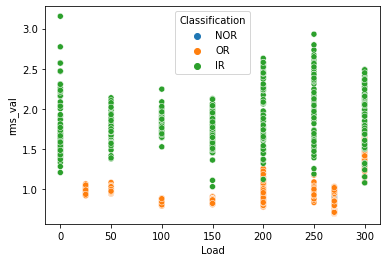

In [82]:
sns.scatterplot(x=data['Load'],y=data['rms_val'],hue=data['Classification'])

<AxesSubplot:xlabel='rms_val', ylabel='Mean_val'>

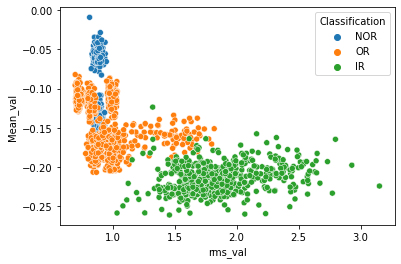

In [83]:
sns.scatterplot(x=data['rms_val'],y=data['Mean_val'],hue=data['Classification'])

<AxesSubplot:xlabel='Mean_val', ylabel='kurts_val'>

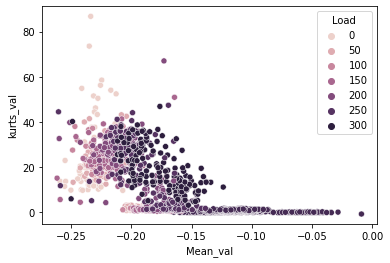

In [96]:
sns.scatterplot(x=data['Mean_val'],y=data['kurts_val'],hue=data['Load'])

<AxesSubplot:xlabel='Mean_val', ylabel='kurts_val'>

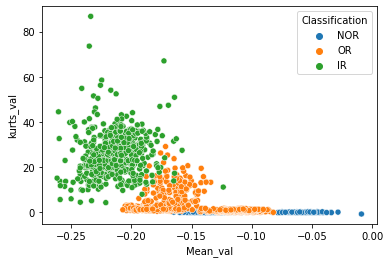

In [97]:
sns.scatterplot(x=data['Mean_val'],y=data['kurts_val'],hue=data['Classification'])

# Thus it can be concluded that the data has some classification boundaries thus a classifier for the boundary can be tested